## Playing with neurons (KERAS)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import tensorflow.keras as kr # instead of keras as kr

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)

In [4]:
x = np.linspace(-10.0, 10.0, 2000) # Array with 2000 data points

y_l = (3.0 * x) + 5.0 # 3 times X plus 5 (array)
y_p = (x * x) - 41.0 # X squared minus 41 (array) hyperbolic because squared
y_s = 10.0 * np.sin(2.0 * x) # sinwave/what the sin function looks likes

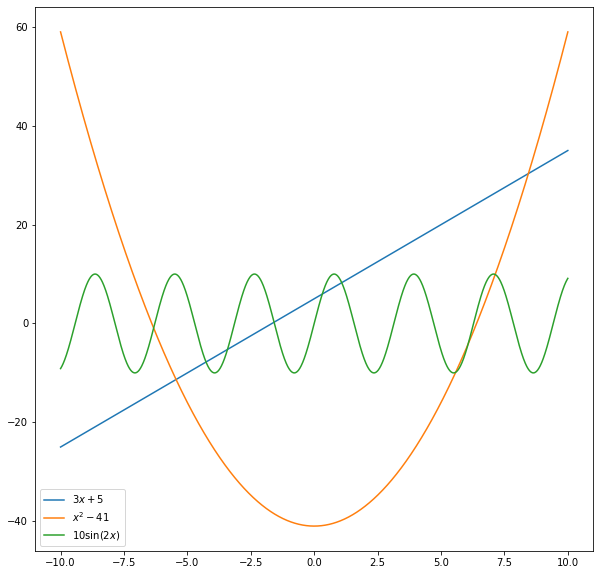

In [5]:
# plot the 3 Y arrays:

plt.plot(x, y_l, label='$3x + 5$') # LaTex labels
plt.plot(x, y_p, label='$x^2 - 41$')
plt.plot(x, y_s, label='$10 \sin(2x)$')

plt.legend()

Now, we wil create a neural net that is trained to take the X input values and mimic any of the 3 above functions:

Train on 2000 samples
Epoch 1/15
2000/2000 [==============================] - 1s 620us/sample - loss: 209.4268
Epoch 2/15
2000/2000 [==============================] - 0s 230us/sample - loss: 44.6019
Epoch 3/15
2000/2000 [==============================] - 0s 204us/sample - loss: 13.0742
Epoch 4/15
2000/2000 [==============================] - 0s 239us/sample - loss: 6.1153
Epoch 5/15
2000/2000 [==============================] - 0s 249us/sample - loss: 3.5806
Epoch 6/15
2000/2000 [==============================] - 0s 225us/sample - loss: 2.4252
Epoch 7/15
2000/2000 [==============================] - 0s 236us/sample - loss: 1.7789
Epoch 8/15
2000/2000 [==============================] - 0s 192us/sample - loss: 1.3981
Epoch 9/15
2000/2000 [==============================] - 0s 231us/sample - loss: 1.1154
Epoch 10/15
2000/2000 [==============================] - 0s 205us/sample - loss: 0.9301
Epoch 11/15
2000/2000 [==============================] - 0s 199us/sample - loss: 0.7793
Epoch 12/15
200

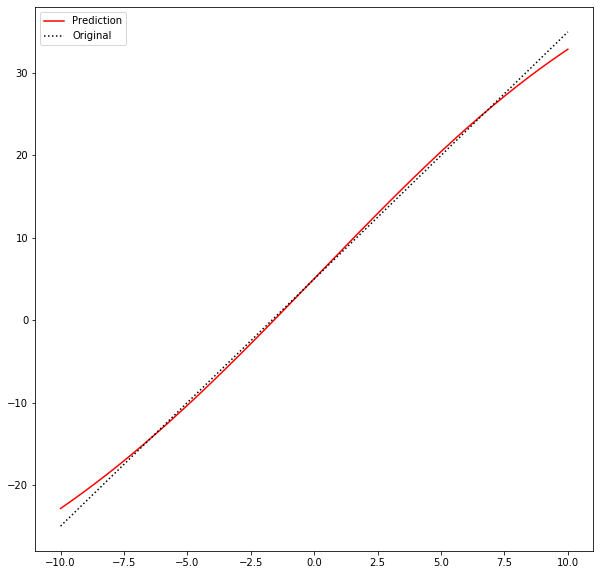

In [19]:
# Our functions to try out:

y = y_l # Linear (Predicts really well)
#y = y_p # Polynomial (Predicts well)
#y = y_s # Sin (Terrible prediction)

# Create a new neural network.
m = kr.models.Sequential() # sequential so we can build layers one by one 

# Add neurons.
#m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add neurons/4 layers (3 more, 1 already added) 1 input, 1 output
# tanh, sigmoid
# If you change the first parameter from 10 to 1 look at the effects:
m.add(kr.layers.Dense(10, input_dim=1, activation="tanh")) # tanh like the tan function
# linear (synonymous with NO activation function)
# Notice from the linear output it has a tanh type output (curvy!!!)
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, activation='linear')) # only 1 neuron as we only want 1 output

# Compile the model.
# adam / sgd / relu ?????: sgd can be better at times
# adam can be better when things are out of hand at the start
m.compile(loss="mean_squared_error", optimizer="adam") # adam is the stochastic gradient descent optimiser
# the mean sq error allows Keras to figure out how close it is to what we WANT it to be
# "adam" is what we use to improve on the mean squared error score i.e. get closer to our desired Y output value

# Train the model. You can use any x y values 
m.fit(x, y, epochs=15, batch_size=10) # epochs:USE this dataset 15 times, batch_size: take the first 10 values
# Increasing the epochs can be a very useful method of optimisation(Decreasing loss)

# Run each x value through the neural network.
p = m.predict(x) # show me the predictions for all of the X values

# THUS we want p and y to be as similar as possible
# This is a form of supervised learning because we have to tell the NN some of the inputs/outputs
# Plot the values.
plt.plot(x, p, 'r-', label='Prediction')
plt.plot(x, y, 'k:', label='Original')
plt.legend()


# WHAT WE CAN CHANGE TO OPTIMISE THE NN:
# The number of neurons in the layers
# Sometimes the amount of inputss
# Change the activation functions
# Rarely ever change our loss function
# Change the optimiser
# The number of times the different x and y values go through the NN (epochs/batch_size)
# CHANGE the weights and the biases(See below)

# Neural nets are trained via a "learning rate" i.e. a number associated with the size
# of a jump a NN is willing to take when it gets sth wrong, so before we do that 
# we ask it for its CURRENT prediction, so it will then give you a y value output 
# The NN learns via the loss function, i.e. to figure out how far away those two value are from each other 
# i.e. what it SHOULD have given you and what it DID give you. It will then take the
# optimizer (e.g. stochastic gradient decent) and will jump the weights and the biases a bit 
# in the right direction so that next time you feed in the x value,we will get a little bit closer
# to the y value we really want 

# We just dont want it to OVERJUMP the mark
# AND it is the learning rate waht usually causes trouble in NN's
# "adam" changes the learning rate based on different parameters
# adam rarely produces NAN, or lose the training of the NN b
# we always want the loss function to get SMALLER untill close to 0: Which would 
# mean our predictions are very close to what we want

### WHAT WE CAN CHANGE TO OPTIMISE THE NN:

- The number of neurons in the layers
- Sometimes the amount of inputss
- Change the activation functions
- Rarely ever change our loss function
- Change the optimiser
- The number of times the different x and y values go through the NN (epochs/batch_size)
- CHANGE the weights and the biases(See below)

Neural nets are trained via a "learning rate" i.e. a number associated with the size
of a jump a NN is willing to take when it gets sth wrong, so before we do that 
we ask it for its CURRENT prediction, so it will then give you a y value output 

The NN learns via the loss function, i.e. to figure out how far away those two value are from each other 
i.e. what it SHOULD have given you and what it DID give you. It will then take the
optimizer (e.g. stochastic gradient decent) and will jump the weights and the biases a bit 
in the right direction so that next time you feed in the x value,we will get a little bit closer
to the y value we really want 

- We just dont want it to OVERJUMP the mark

- AND it is the learning rate waht usually causes trouble in NN's
- "adam" changes the learning rate based on different parameters
- adam rarely produces NAN, or lose the training of the NN 
- we always want the loss function to get SMALLER untill close to 0: Which would 
mean our predictions are very close to what we want
- If we increased the number of epochs, it is always better to make small little jumps(small learning rate, little improvements). INCREASING the epochs can be a very good method of decreasing the loss values and getting closer to 0
- outputs always invlove the summation of the activation function which explains curves etc 
- the only thing that is ever really changing is the output neuron
- !! BAD functions like our third sin function can only really be bettererd by
increasing the number of neurons, or play with the activation functions. Its v hard to train a NN on something like a sin function
- Its all about simply finding the right balance for you own function that you want to get the NN to MIMIC. One approach wont necessarily work for another.